In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

### 자전거 대여

In [3]:
df = pd.read_csv('bike.csv', encoding='euc-kr')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape

(10886, 12)

In [5]:
# 날짜data를 가져오고 싶을 때 먼저 date type으로 변경해주고 가져와야 됨
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

# 요일(월-0 ~ 일-6)
df['dayofweek'] = df['datetime'].dt.dayofweek
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [16]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [ ]:
# 왜 안됨??ㅠㅠ
plt.plot(data=df,x='month',y='count',kind='bar')

In [ ]:
dt = df.copy()
# 날짜 포맷팅
dt.index = pd.to_datetime(dt.index, format='%Y-%m-%d-%H-%M-%S')
dt.set_index([dt.index.year, dt.index.month], inplace=True)
dt.index.names = ['연도','월']
dt

<AxesSubplot:xlabel='year', ylabel='count'>

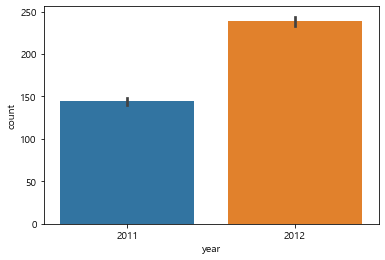

In [12]:
sns.barplot(x='year',y='count', data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

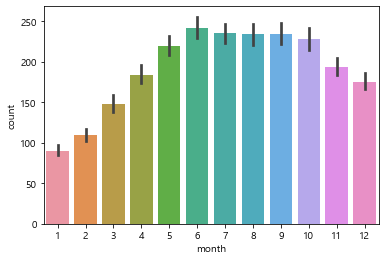

In [13]:
sns.barplot(x='month',y='count', data=df)

<AxesSubplot:xlabel='season', ylabel='count'>

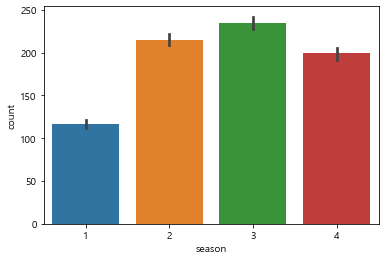

In [20]:
sns.barplot(x='season',y='count', data=df)

<AxesSubplot:xlabel='hour', ylabel='count'>

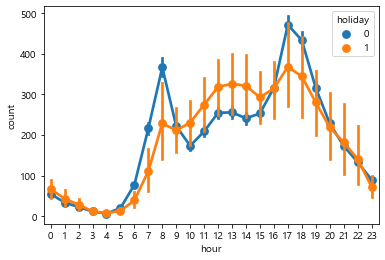

In [23]:
sns.pointplot(x='hour',y='count', data=df, hue='holiday')

<AxesSubplot:xlabel='hour', ylabel='count'>

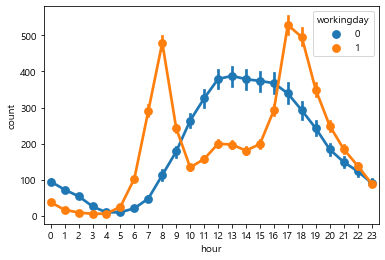

In [24]:
sns.pointplot(x='hour',y='count', data=df, hue='workingday')

<AxesSubplot:xlabel='hour', ylabel='count'>

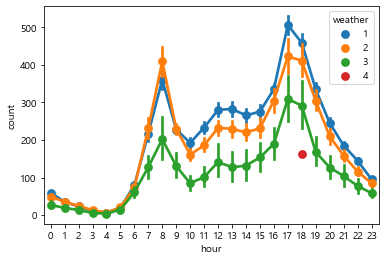

In [25]:
sns.pointplot(x='hour',y='count', data=df, hue='weather')

<AxesSubplot:xlabel='humidity', ylabel='count'>

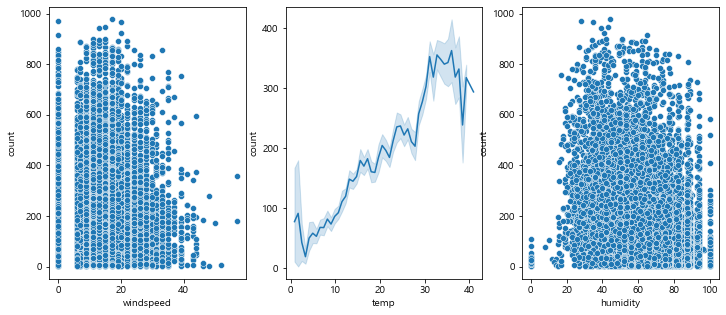

In [13]:
# 그래프 한번에 나타내기
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))
sns.scatterplot(data=df,x='windspeed',y='count',ax=ax1)
sns.lineplot(data=df,x='temp',y='count',ax=ax2)
sns.scatterplot(data=df,x='humidity',y='count',ax=ax3)

In [14]:
len(df[df.windspeed == 0])

1313

<AxesSubplot:xlabel='atemp', ylabel='count'>

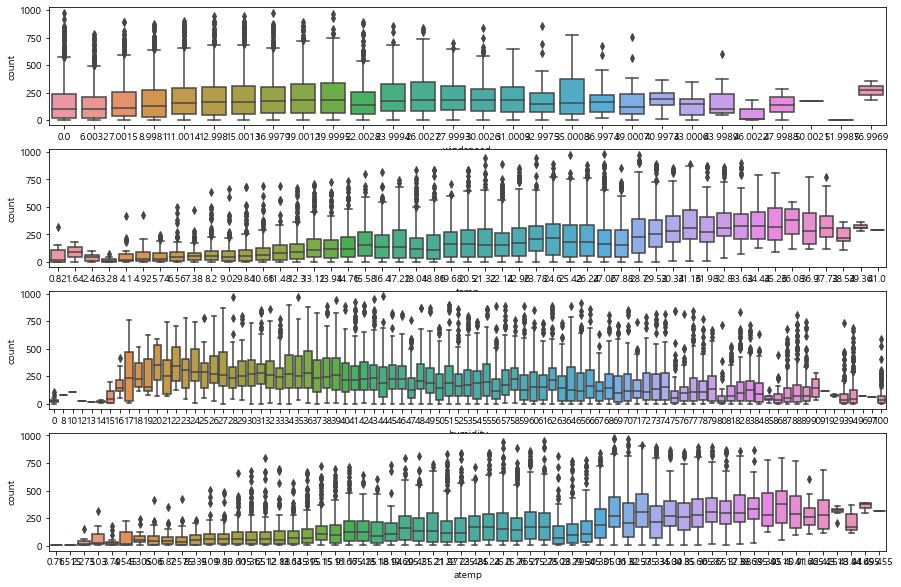

In [31]:
# 이상치 확인
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(15,10))
sns.boxplot(data=df,x='windspeed',y = 'count',ax=ax1)
sns.boxplot(data=df,x='temp',y = 'count',ax=ax2)
sns.boxplot(data=df,x='humidity',y = 'count',ax=ax3)
sns.boxplot(data=df,x='atemp',y = 'count',ax=ax4)

In [32]:
df[df.windspeed == 0].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5
